In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# set to one to run the tests in the notebook
%env TEST_RUN=1

env: TEST_RUN=1


An alchemical model for high-entropy alloys.
============================================

This example shows how to train a potential that can model the energetics of bulk phases containing up to 25 transition metals.  The potential uses atom-centered correlation features: it first describes the neighborhood $A_i$ of each atom in the system in terms of the density of its neighbors, and then computes symmetrized tensor products of this density to obtain an invariant basis to express the functional relation between a structure and its energy, 

$$
E(A) = \sum_i E(A_i) 
$$

Each element yields a separate channel in the neighbor density, which translates in a steep increase of memory and computational requirements as one computes correlation functions of a many-element system: two-neighbor correlations require $n_species^2$ entries, and so on.

An alchemical compression scheme cf. [Willat et al, PCCP (2018)](https://doi.org/10.1039/c8cp05921g) avoids this problem by projecting the neighbor density on a lower-dimensional space of "pseudo-elements". 

## Preparation

Make sure you install the packages listed in `requirements.txt`. These are pinned to very specific versions of these codes: there is no guarantee that this example will work with more recent versions of these packages. Furthermore, you should separately clone the `alchemical-learning` repository. 

```
git clone git@github.com:Luthaf/alchemical-learning.git
```

In [3]:
%%script bash --no-raise-error
if [ -z $TEST_RUN ]; then exit; fi
git clone git@github.com:Luthaf/alchemical-learning.git

fatal: destination path 'alchemical-learning' already exists and is not an empty directory.


## Training the potential

You can fetch a data file containing approximately 25'000 configurations (including distorted _fcc_ and _bcc_ structures with up to 25 elements) from a
** public repository **

```
wget https://www.dropbox.com/s/9jzgn2r76rmb588/data_shuffle_final.xyz?dl=1
``` 

In [4]:
%%script bash 
if [ -z $TEST_RUN ]; then exit; fi
wget https://www.dropbox.com/s/9jzgn2r76rmb588/data_shuffle_final.xyz?dl=1 -O data_shuffle_final.xyz

--2022-11-29 15:31:14--  https://www.dropbox.com/s/9jzgn2r76rmb588/data_shuffle_final.xyz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9jzgn2r76rmb588/data_shuffle_final.xyz [following]
--2022-11-29 15:31:15--  https://www.dropbox.com/s/dl/9jzgn2r76rmb588/data_shuffle_final.xyz
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5dbbda0ed211657d836110e0b0.dl.dropboxusercontent.com/cd/0/get/BxqgnIheFPReapB8l2EQer-n9SURBMaaihEJPmogMvtkc_ikBQJOlpebNWxdyXUoamKv5j_gb7txUraZS2RZqsW-E4YIh1Hx1D1rhn09sMuArNCjUMFKhkWtdDqsXNov1U9ULbzhcqptz0J6e9RLjPWPghe91dPSGRPQ_8AsAnL51Q/file?dl=1# [following]
--2022-11-29 15:31:16--  https://uc5dbbda0ed211657d836110e0b0.dl.dropboxusercontent.com/cd/0/get/BxqgnIheFPReapB8l2EQer-n9SURB

** explain how to run the training ** 

Text(0, 0.5, 'DFT energy / eV')

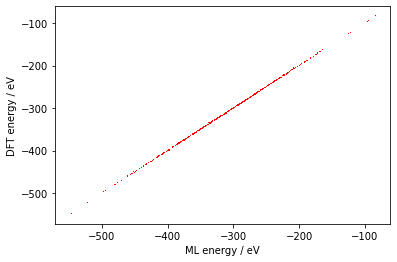

In [5]:
test_energies = np.loadtxt('reference_data/potential/energy_test.dat')
plt.plot(test_energies[:,0], test_energies[:,1], 'r,')
plt.xlabel('ML energy / eV')
plt.ylabel('DFT energy / eV')

In [6]:
%%script bash
if [ -z $TEST_RUN ]; then exit; fi
python alchemical-learning/fit-alchemical-potential.py test_data/test_data.xyz test_data/train-test_model.json

Reading file and properties
All species  [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 39, 40, 41, 42, 44, 45, 46, 47, 71, 72, 73, 74, 77, 78, 79]
using 32 training frames and 2 training frames with forces
Computing representations
Timing for key2prop 0.00101470947265625
Timing for key2prop 0.002392292022705078
Timing for key2prop 0.0018310546875
Timing for key2prop 0.007193565368652344
Timing for key2prop 0.006097078323364258
Timing for key2prop 0.0014777183532714844
Timing for key2prop 0.0009217262268066406
Timing for key2prop 0.002554655075073242
Timing for key2prop 0.002032041549682617
Timing for key2prop 0.009358644485473633
Timing for key2prop 0.007390022277832031
Timing for key2prop 0.0016412734985351562
Timing for key2prop 0.0020990371704101562
Timing for key2prop 0.003731966018676758
Timing for key2prop 0.0022919178009033203
Timing for key2prop 0.001605987548828125
Timing for key2prop 0.003223419189453125
Timing for key2prop 0.002256155014038086
Timing for key2prop 0.00895953178405

## Simulating segregation in a Cantor-style equimolar high-entropy alloy

In [7]:
%%script bash
if [ -z $TEST_RUN ]; then exit; fi
i-pi test_data/test_ipi.xml &
sleep 4
i-pi-py_driver -a hea_ipi_test -u -m alchemical -o reference_data/potential/best.torch,reference_data/potential/parameters.json,all-hea-125.extxyz &
i-pi-py_driver -a hea_ipi_test -u -m alchemical -o reference_data/potential/best.torch,reference_data/potential/parameters.json,all-hea-125.extxyz &
wait


 ____       ____       ____       ____
/    \     /    \     /    \     /    \
|  #################################  |
\__#_/     \____/     \____/     \_#__/
   #    _        _______  _____    #
   #   (_)      |_   __ \|_   _|   #      -*-     v 2.0    -*-
   #   __  ______ | |__) | | |     #
   Y  [  ||______||  ___/  | |     #      A Universal Force Engine
  0 0  | |       _| |_    _| |_    #
   #  [___]     |_____|  |_____|   #
 __#_       ____       ____       _#__
/  # \     /    \     /    \     / #  \
|  #################################  |
\____/     \____/     \____/     \____/

    
 # @simulation: Fetchingffsocket
Generating system from template: 
 
  <system prefix='0'>
    <initialize nbeads='1'>
      <file mode='ase' units='angstrom' cell_units='angstrom'>all-hea-125.extxyz</file>
      <velocities mode='thermal' units='kelvin'>300</velocities>
    </initialize>
    <forces>
      <force forcefield='driver'>
      </force>
    </forces>
    <motion mode='multi'>
     

rascaline backward = 1.58919ms
rascaline backward = 1.13536ms
rascaline backward = 1.30543ms
rascaline backward = 1.35192ms
rascaline backward = 1.61835ms
rascaline backward = 1.57612ms
rascaline backward = 1.51214ms
rascaline backward = 1.52747ms
rascaline backward = 1.15539ms
rascaline backward = 1.91854ms
rascaline backward = 2.22317ms
rascaline backward = 1.55062ms
rascaline backward = 1.32084ms
rascaline backward = 1.48227ms
rascaline backward = 1.45382ms
rascaline backward = 1.39595ms
rascaline backward = 0.988081ms
rascaline backward = 3.156ms
rascaline backward = 3.53897ms
rascaline backward = 2.90769ms
rascaline backward = 2.38598ms
rascaline backward = 1.58315ms
rascaline backward = 5.11868ms
rascaline backward = 1.55723ms
rascaline backward = 1.35237ms
rascaline backward = 1.25878ms
rascaline backward = 1.58637ms
rascaline backward = 1.20726ms
rascaline backward = 1.53861ms
rascaline backward = 1.41586ms
rascaline backward = 1.11836ms
rascaline backward = 2.13702ms
rascaline